In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img3d = np.load("../matrices/NORMALIZED-RP-STACK.npy")

In [7]:
img2d = img3d[30:1054,30:1054,300]

# Set subdivision count. This is not the size of the grid blocks, but the number of them.
subdiv = 4
if subdiv % 2 != 0:
    # This error is only relevant for your 1024x1024 version
    # No matter what the image needs to be perfectly divisible by the subdivisions though.
    raise ValueError("Subdivision must be divisible by 2.")

In [9]:
# np.split can only operate along one axis at a time, split this into two operations.

# Split the image horizontally first.
x1 = np.split(img2d, subdiv)

# Split the image vertically, insert into list.
# This is a list-of-lists, not a 2D list, make sure to index it as such.
x2 = []
for x in x1:
    x2.append(np.split(x, subdiv, axis=1))

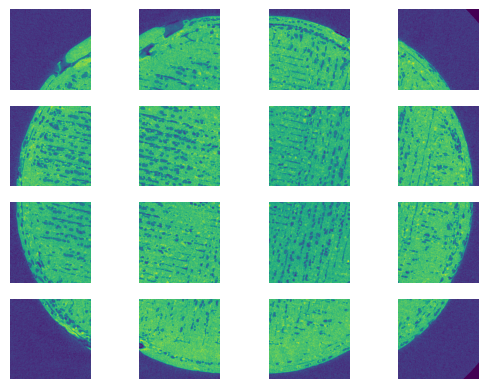

In [11]:
fig, axs = plt.subplots(subdiv,subdiv)
for i in range(subdiv):
    for j in range(subdiv):
        axs[i,j].imshow(x2[i][j])  # Notice the two sets of square brackets. list-of-lists
        axs[i,j].axis(False)
plt.subplots_adjust(wspace=None, hspace=None)
plt.show()